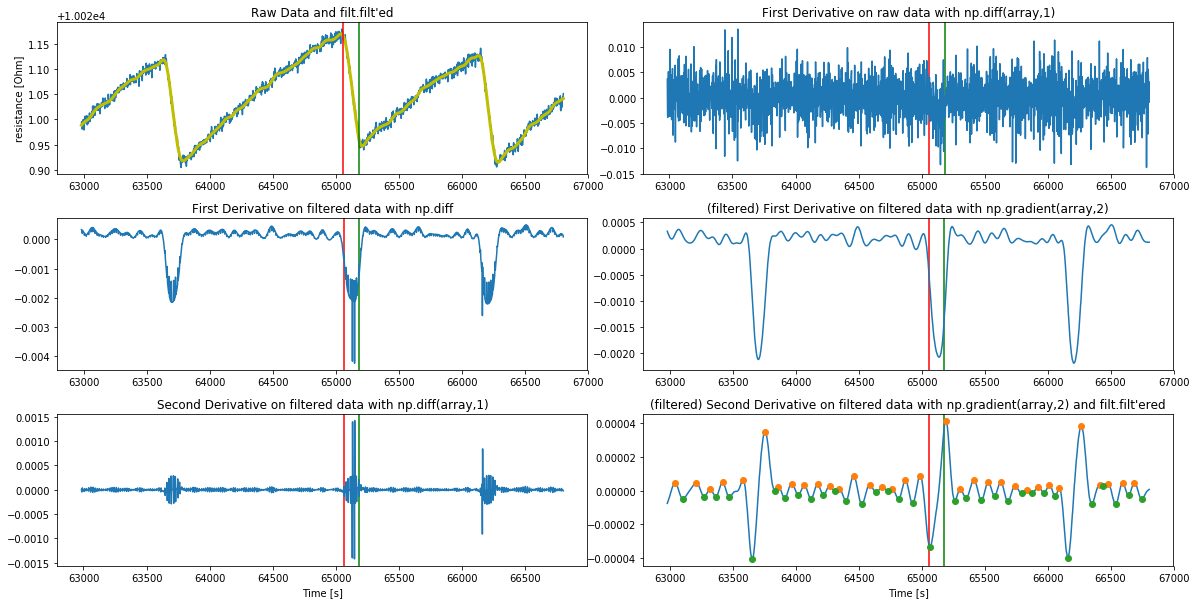

In [1]:
import numpy as np
import matplotlib.pyplot as pyplt
import matplotlib

dirname = "."
# filtration of noise inspired by https://stackoverflow.com/questions/28536191/how-to-filter-smooth-with-scipy-numpy
# See also the documentation on filtfilt here
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.filtfilt.html
from scipy.signal import butter, filtfilt, argrelextrema

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    sm_y = filtfilt(b, a, data)
    return sm_y

# Parameters used for the filtration of noisy data
cutoff = 1500
fs = 50000

fig = pyplt.figure(figsize=(10.0,3.0))
fig.tight_layout()

Core_data = np.loadtxt(fname='2015_12_22_15_44_20_strip.dat', skiprows=1)
data = Core_data[-2800:-1000][:]
time = data[:,0]
resistance = data[:,1]

#Smoothing of resistance data using filtfilt.
y_smooth = butter_lowpass_filtfilt(resistance, cutoff, fs=60000)

# By finite differences, the first order derivative of the smoothed y axes for each mean value of x over your array is given by:
dy=np.diff(y_smooth,1) # note that the first derivative is calculated over y_smooth, *not* resistance
dx=np.diff(time,1)

dy_raw = np.diff(resistance,1)
dy_smooth_gradient=np.gradient(y_smooth,4)
dx_gradient=np.gradient(time,4)

#dx=np.gradient(time,1)
yfirst=dy/dx
yfirst_raw=dy_raw/dx
yfirst_gradient = dy_smooth_gradient/dx_gradient
yfirst_gradient = butter_lowpass_filtfilt(yfirst_gradient, cutoff=1500, fs=60000)

# [...] the corresponding values of x are 
xfirst=0.5*(time[:-1]+time[1:])

# Should one need to smooth the first derivative as well
yfirst_smooth = butter_lowpass_filtfilt(yfirst, cutoff=1500, fs=10000)

# For the second order, do the same process again
dyfirst=np.diff(yfirst,1)
dxfirst=np.diff(xfirst,1)
ysecond=dyfirst/dxfirst

dyfirst_gradient = np.gradient(yfirst_gradient,3)
dxfirst_gradient = np.gradient(time,3)
ysecond_gradient = dyfirst_gradient/dxfirst_gradient
ysecond_gradient = butter_lowpass_filtfilt(ysecond_gradient, cutoff=1500, fs=60000)

maxima = argrelextrema(ysecond_gradient, np.greater)
minima = argrelextrema(ysecond_gradient, np.less)

# the corresponding values of x are: 
xsecond=0.5*(xfirst[:-1]+xfirst[1:])

# create a grid for the plots and arrangements of plots
f = pyplt.figure(figsize=(20,10))
gs = matplotlib.gridspec.GridSpec(6, 6, hspace=0.8, wspace=0.4)

ax1 = f.add_subplot(gs[:2,:3])
ax2 = f.add_subplot(gs[2:4,:3])
ax3 = f.add_subplot(gs[4:6,:3])
ax4 = f.add_subplot(gs[:2,3:6])
ax5 = f.add_subplot(gs[2:4,3:6])
ax6 = f.add_subplot(gs[4:6,3:6])

#Populating the plots
#ax1: original data plus smoothing
ax1.plot(time,resistance)
ax1.set_ylabel("resistance [Ohm]")
ax1.set_title("Raw Data and filt.filt'ed")
ax1.plot(time,y_smooth, color='y', linewidth=3.0)

ax1.axvline(x=65062, color='r')
ax2.axvline(x=65062, color='r')
ax3.axvline(x=65062, color='r')
ax4.axvline(x=65062, color='r')
ax5.axvline(x=65062, color='r')
ax6.axvline(x=65062, color='r')

ax1.axvline(x=65182, color='green')
ax2.axvline(x=65182, color='green')
ax3.axvline(x=65182, color='green')
ax4.axvline(x=65182, color='green')
ax5.axvline(x=65182, color='green')
ax6.axvline(x=65182, color='green')

#ax2.set_title("Original data, smoothed using filt.filt")
#ax2.plot(time,y_smooth)

ax2.plot(xfirst,yfirst)
#ax3.plot(time,yfirst)
#ax2.set_ylabel("dy/dx")
#ax2.set_xlabel("Time [s]")
ax2.set_title("First Derivative on filtered data with np.diff")

ax3.plot(xsecond,ysecond)
#ax4.plot(time,ysecond)
#ax3.set_ylabel("d2y/d2x")
ax3.set_xlabel("Time [s]")
ax3.set_title("Second Derivative on filtered data with np.diff(array,1)")

ax4.set_title("First Derivative on raw data with np.diff(array,1)")
ax4.plot(xfirst,yfirst_raw)

ax5.plot(time, yfirst_gradient)
ax5.set_title("(filtered) First Derivative on filtered data with np.gradient(array,2)")

ax6.set_xlabel("Time [s]")
ax6.plot(time, ysecond_gradient)
ax6.plot(time[maxima],ysecond_gradient[maxima], marker='o', linestyle='None')
ax6.plot(time[minima],ysecond_gradient[minima], marker='o', linestyle='None')

ax6.set_title("(filtered) Second Derivative on filtered data with np.gradient(array,2) and filt.filt'ered")

pyplt.savefig(dirname+"/"+"derivate_filters"+".png")
pyplt.show()


<function matplotlib.pyplot.plot>

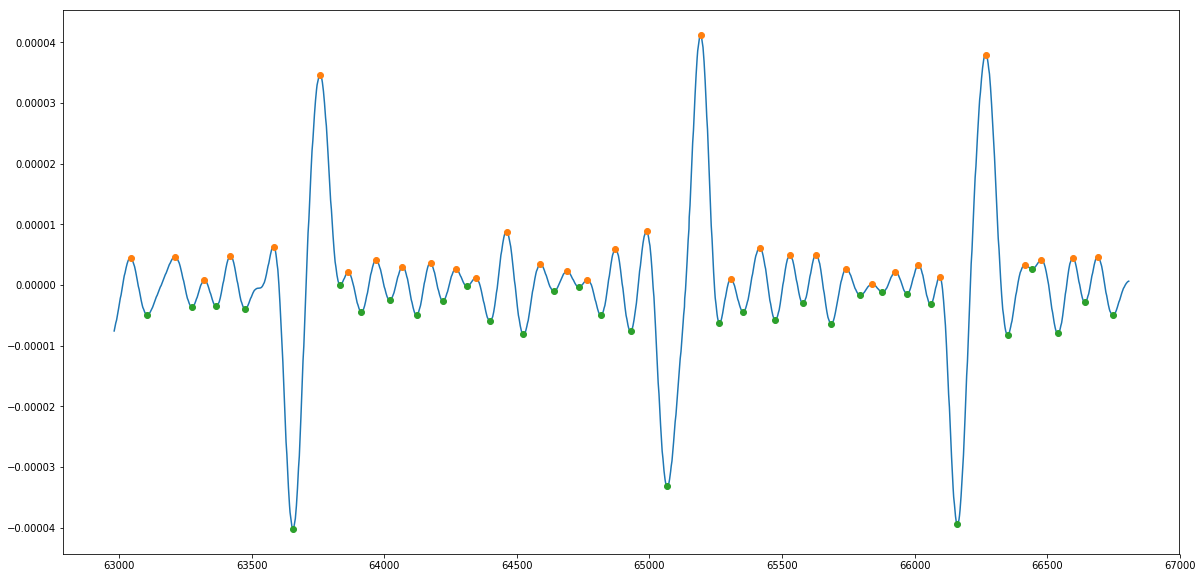

In [2]:
%matplotlib inline
pyplt.figure(figsize=(20,10))
pyplt.plot(time, ysecond_gradient)
pyplt.plot(time[maxima],ysecond_gradient[maxima], marker='o', linestyle='None')
pyplt.plot(time[minima],ysecond_gradient[minima], marker='o', linestyle='None')
pyplt.plot

In [233]:
pyplt.plot?

In [137]:
dyfirst.size

499

In [138]:
dxfirst.size

498

In [116]:
pyplt.axvline?